In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display
import sys
import pandas as pd
import seaborn.apionly as sns
plt.style.use('ggplot')
sns.set_style('ticks')
import re
import matplotlib.ticker as ticker
# Enable inline plotting  
%matplotlib inline

In [3]:
print ('Python version ' + sys.version)
print ('Pandas version ' + pd.__version__)
print ('Numpy version ' + np.__version__)

Python version 3.5.5 | packaged by conda-forge | (default, Jul 23 2018, 23:45:11) 
[GCC 4.2.1 Compatible Apple LLVM 6.1.0 (clang-602.0.53)]
Pandas version 0.23.4
Numpy version 1.15.2


In [4]:
data_1x_comet_S = 'df7-comm-updated-rmsd-traj-split.csv'
data_1x_comet_SG = 'df7-comm-updated-rmsd-traj-split-GA.csv'
data_1x_SuperMIC_S = 'df7-comm-updated-rmsd-traj-split-SuperMIC.csv'
data_1x_SuperMIC_SG = 'df7-comm-updated-rmsd-traj-split-GA-SuperMIC.csv'

In [5]:
df7_1x_comet_S = pd.read_csv(data_1x_comet_S)
df7_1x_comet_SG = pd.read_csv(data_1x_comet_SG)
df7_1x_SuperMIC_S = pd.read_csv(data_1x_SuperMIC_S)
df7_1x_SuperMIC_SG = pd.read_csv(data_1x_SuperMIC_SG)

# Fig 8(a)

/Users/mahzadkhoshlessan/miniconda3/envs/ml/lib/python3.5/site-packages/ipykernel_launcher.py:23: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


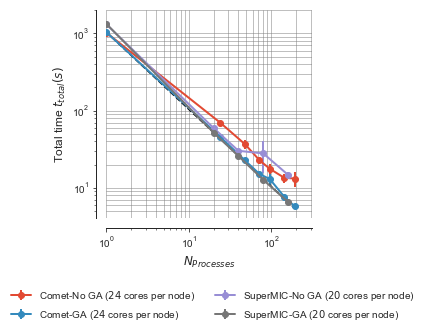

In [18]:
import matplotlib as mpl

matplotlib.rcParams['legend.fontsize'] = 10
plt.style.use('ggplot')
sns.set_style('ticks')

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)

df = [df7_1x_comet_S,df7_1x_comet_SG, df7_1x_SuperMIC_S,df7_1x_SuperMIC_SG]
labels = ['Comet-No GA ($24$ cores per node)','Comet-GA ($24$ cores per node)','SuperMIC-No GA ($20$ cores per node)',
         'SuperMIC-GA ($20$ cores per node)']

df[0].plot(y='t_tot_max', yerr='std_tot_max', ax=ax, marker='o', lw=2, label=labels[0])
df[1].plot(y='t_tot_max', yerr='std_tot_max', ax=ax, marker='o', lw=2, label=labels[1])
df[2].plot(y='t_tot_max', yerr='std_tot_max', ax=ax, marker='o', lw=2, label=labels[2])
df[3].plot(y='t_tot_max', yerr='std_tot_max', ax=ax, marker='o', lw=2, label=labels[3])
    
ax.set_xlabel('$N_{Processes}$')    
ax.set_ylabel('Total time $t_{total}(s)$')
ax.loglog([1, 192], [df[1]['t_tot_max'][1], df[1]['t_tot_max'][1]/192.], '--',color='black')
ax.set_xlim(1, 310)  
ax.set_ylim(0, 2000)

ax.yaxis.grid(which='major', linewidth='0.5', color='grey')
ax.xaxis.grid(which='major', linewidth='0.5', color='grey')
ax.yaxis.grid(which='minor', linewidth='0.5', color='grey')
ax.xaxis.grid(which='minor', linewidth='0.5', color='grey')

sns.despine(offset=10, ax=ax)
lgd = ax.legend(loc='upper center', bbox_to_anchor=(0.52, -0.3), frameon=False, shadow=True, ncol=2)
plt.tight_layout()
plt.show()
fig_name = 'Comparison_t-tot-clusters_Splitting'
fig.savefig('{}.pdf'.format(fig_name),bbox_extra_artists=(lgd,), bbox_inches='tight')

# Fig 8(b) 

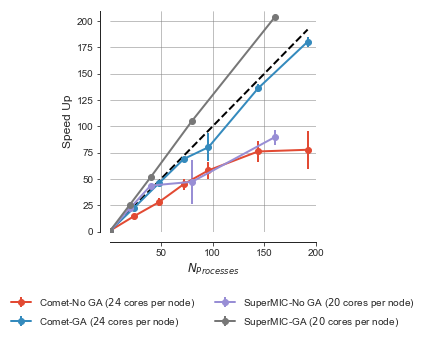

In [27]:
import matplotlib as mpl

matplotlib.rcParams['legend.fontsize'] = 10
plt.style.use('ggplot')
sns.set_style('ticks')

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)

df = [df7_1x_comet_S,df7_1x_comet_SG, df7_1x_SuperMIC_S,df7_1x_SuperMIC_SG]
labels = ['Comet-No GA ($24$ cores per node)','Comet-GA ($24$ cores per node)','SuperMIC-No GA ($20$ cores per node)',
         'SuperMIC-GA ($20$ cores per node)']

df[0].index = df[0].loc[:,'blocks']
df[1].index = df[1].loc[:,'blocks']
df[2].index = df[2].loc[:,'blocks']
df[3].index = df[3].loc[:,'blocks']

df[0].plot(y='speed_up', yerr='std_S', ax=ax, marker='o', lw=2, label=labels[0])
df[1].plot(y='speed_up', yerr='std_S', ax=ax, marker='o', lw=2, label=labels[1])
df[1].plot(y='Ideal_Scaling', ax=ax, linestyle='--', color='k', lw=2, label='')
df[2].plot(y='speed_up', yerr='std_S', ax=ax, marker='o', lw=2, label=labels[2])
df[3].plot(y='speed_up', yerr='std_S', ax=ax, marker='o', lw=2, label=labels[3])
    
ax.set_xlabel('$N_{Processes}$')
ax.set_ylabel('Speed Up')
ax.set_xlim(1, 200)  
ax.set_ylim(0, 210)

ax.yaxis.grid(which='major', linewidth='0.5', color='grey')
ax.xaxis.grid(which='major', linewidth='0.5', color='grey')
ax.yaxis.grid(which='minor', linewidth='0.5', color='grey')
ax.xaxis.grid(which='minor', linewidth='0.5', color='grey')  

sns.despine(offset=10, ax=ax)
lgd = ax.legend(loc='upper center', bbox_to_anchor=(0.50, -0.25), frameon=False, shadow=True, ncol=2)
plt.tight_layout()
plt.show()
fig_name = 'Comparison_speed-up-clusters_Splitting'
fig.savefig('{}.pdf'.format(fig_name),bbox_extra_artists=(lgd,), bbox_inches='tight')